# Goal
Credit One has seen an increase in customers who have defaulted on loans. If this continues, Credit One runs the risk of losing customers, therefor losing revenue. Our Data Science team has been tasked with designing and implementing a creative and empirically sound solution that will better detect the credit worthiness of a customer.

# Data Description
X1 **Limit_Bal** Amount of the given credit: it includes both the individual consumer credit and his/her family credit.  
X2 **Sex** 1 = male 2 = female  
X3 **Education** 1 = graduate school 2 = university 3 = high school [0, 4, 5, 6] = others  
X4 **Marital status** 1 = married 2 = single 3 = divorce 0=others  
X5: **Age** year  

#### History of past payment status (2005)
X6 - X11 September - April  
-2 = No consumption -1 = Paid in full 0 = Use of revolving credit [1:9] x = payment delay by x months


#### Amount of bill statement
X12 - X17 September - April

#### Amount of previous payment
X18 - X23 September - April

Y **Dependent variable** 0 = no default 1 = default

In [75]:
# import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [107]:
credit_data = pd.read_csv('default of credit card clients.csv', header =1)

# rename 'default payment next month to DEFAULT to shorten the column name'
credit_data = credit_data.rename(columns = {"default payment next month":"DEFAULT"})

# remove ID column since it has nothing to do with the data
credit_data.drop(['ID'], axis=1, inplace=True)
credit_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [108]:
credit_data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Of the 30k accounts, on average, 22% defaulted 

In [69]:
credit_data['DEFAULT'].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULT, dtype: float64

In [109]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [ ]:
Create a variable that holds the column names of the data

In [114]:
cols = list(credit_data.columns)

Discretize the age by 10 year segments

/Users/thompsoj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


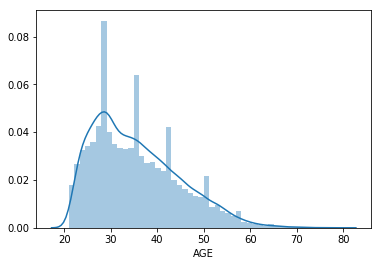

In [13]:
sns.distplot(credit_data['AGE'])

/Users/thompsoj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


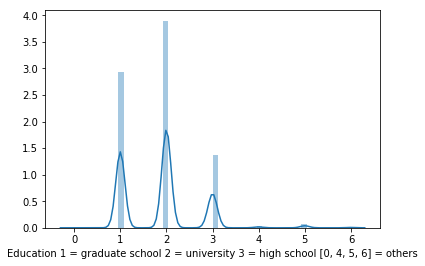

In [31]:
sns.distplot(credit_data['EDUCATION'], axlabel="Education 1 = graduate school 2 = university 3 = high school [0, 4, 5, 6] = others")

/Users/thompsoj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


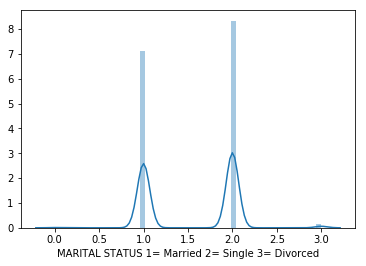

In [30]:
sns.distplot(credit_data['MARRIAGE'], axlabel="MARITAL STATUS 1= Married 2= Single 3= Divorced")

/Users/thompsoj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


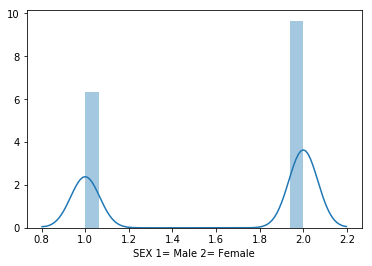

In [29]:
sns.distplot(credit_data['SEX'], axlabel="SEX 1= Male 2= Female")

/Users/thompsoj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


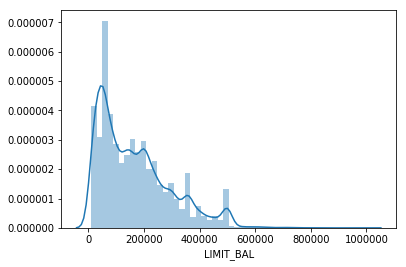

In [64]:
sns.distplot(credit_data['LIMIT_BAL'])

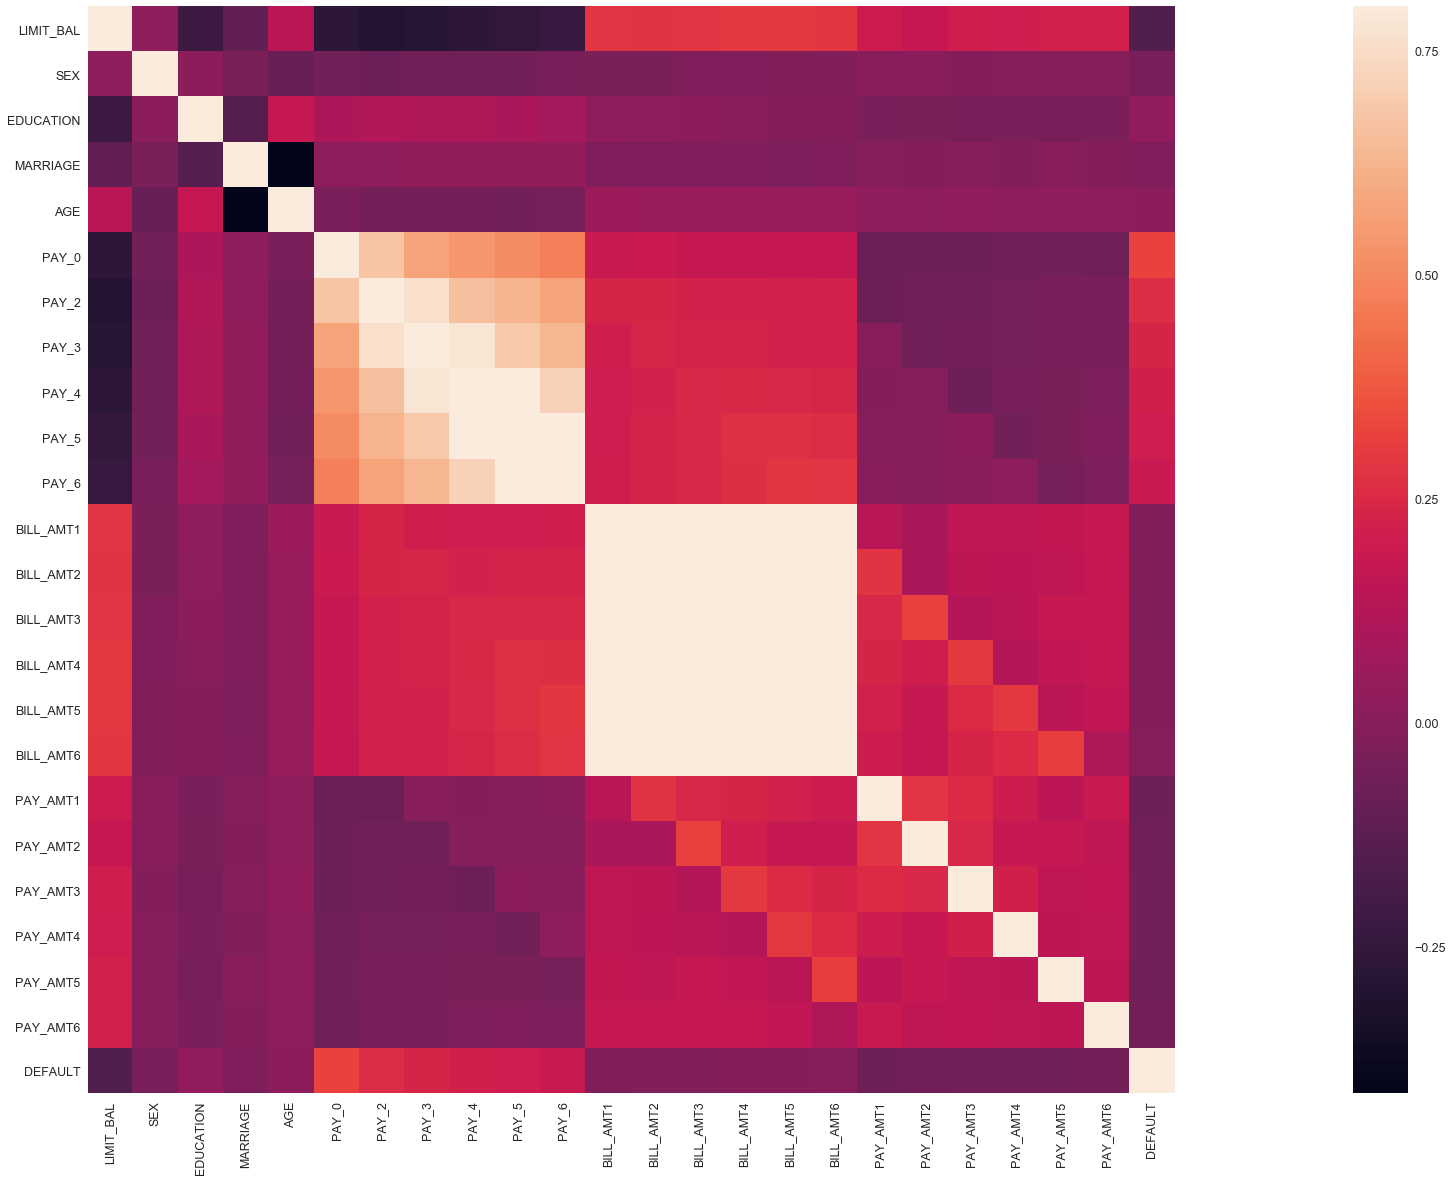

In [116]:
corrmat = credit_data.corr()
f, ax = plt.subplots(figsize=(64, 20))
sns.heatmap(corrmat, vmax=.8, square=True);

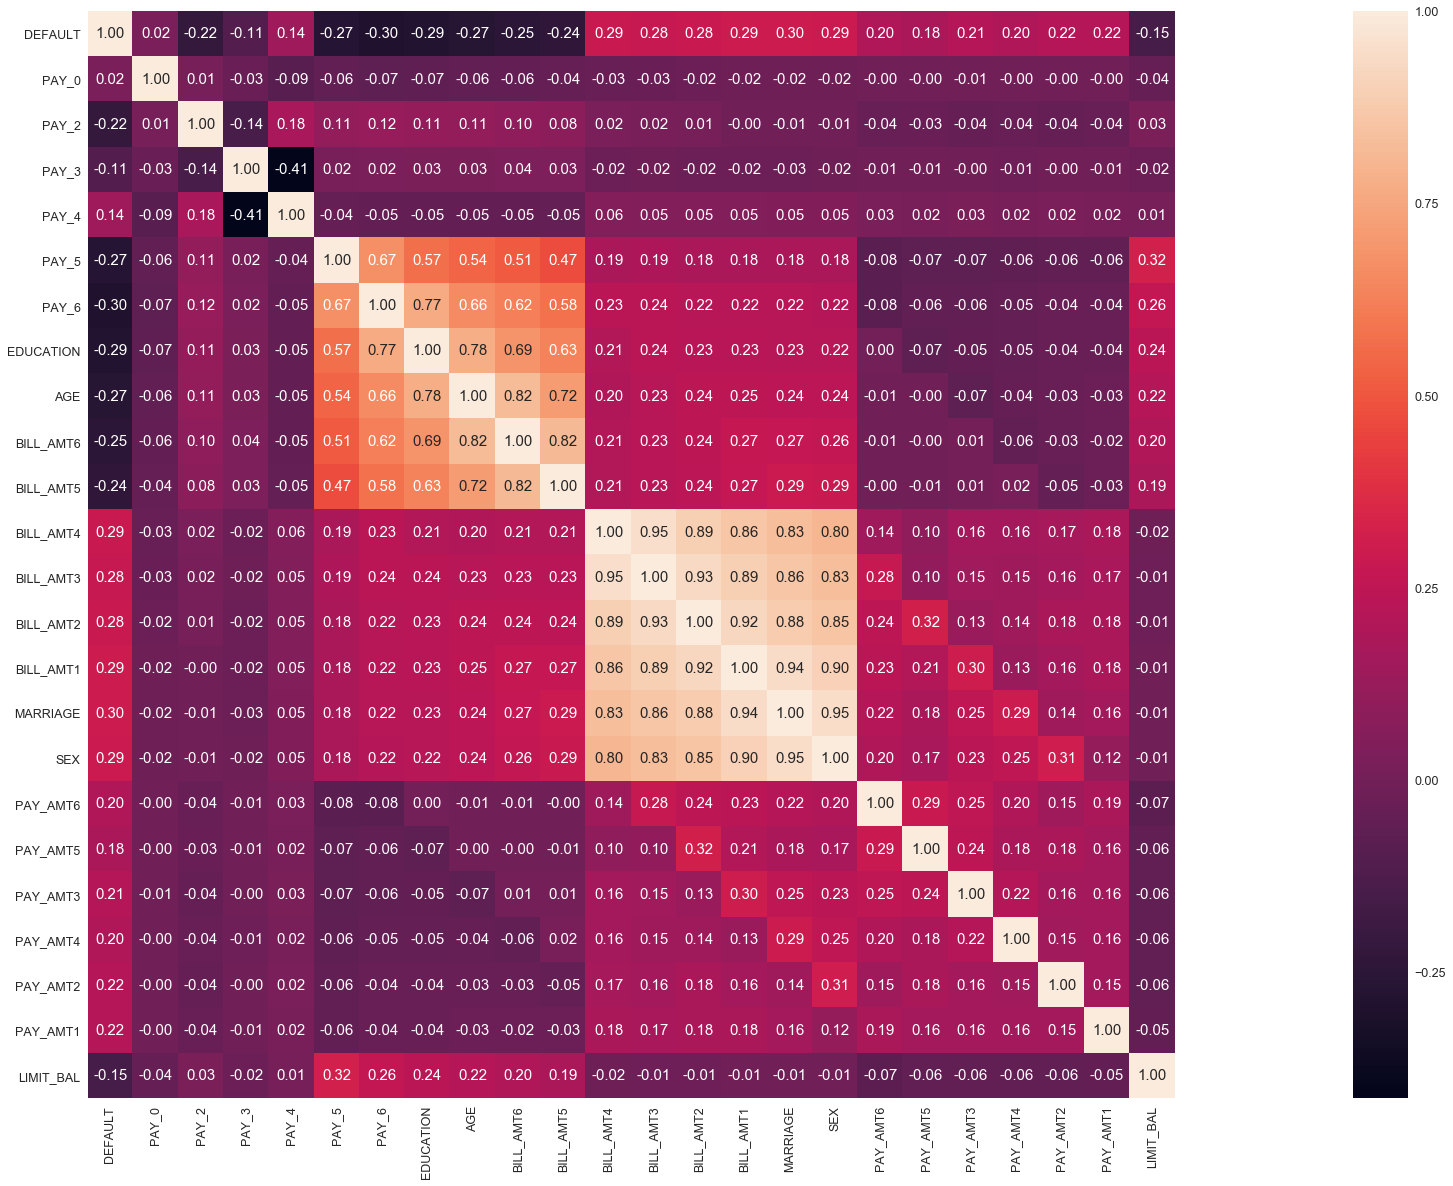

In [115]:
k = 25 #number of variables for heatmap
corr_cols = corrmat.nlargest(k, 'DEFAULT')['DEFAULT'].index
cm = np.corrcoef(credit_data[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize = (64,20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=corr_cols.values, xticklabels=corr_cols.values)
plt.show()

# Appendix

This is how you count specific instances

In [23]:
credit_data[credit_data['AGE'] < 30].count()


ID                            9618
LIMIT_BAL                     9618
SEX                           9618
EDUCATION                     9618
MARRIAGE                      9618
AGE                           9618
PAY_0                         9618
PAY_2                         9618
PAY_3                         9618
PAY_4                         9618
PAY_5                         9618
PAY_6                         9618
BILL_AMT1                     9618
BILL_AMT2                     9618
BILL_AMT3                     9618
BILL_AMT4                     9618
BILL_AMT5                     9618
BILL_AMT6                     9618
PAY_AMT1                      9618
PAY_AMT2                      9618
PAY_AMT3                      9618
PAY_AMT4                      9618
PAY_AMT5                      9618
PAY_AMT6                      9618
default payment next month    9618
dtype: int64

In [ ]:
# adding this above the correlation matrix controled the size
plt.figure(figsize = (64,20))

# remove column from data frame
df.drop(['column name'], axis=1, inplace=True)